In [ ]:
# %load_ext autoreload
# %autoreload 1
# %aimport metaheuristics.algorithme_genetique

In [1]:
cd ..

d:\Git\dir\ICO\codes


In [4]:
from metaheuristics.algorithme_genetique import*
from metaheuristics.base_problem import *
from metaheuristics.simulated_annealing import *
from loading_models import *
from vrptw import VRPTW

In [26]:
# context = load_solomon('simple.csv', nb_cust=10, vehicle_speed=100)
context = create_vrptw(CUSTOMER_DIR, DEPOTS_DIR, VEHICLES_DIR, DEPOTS_DISTANCES_DIR, CUSTOMER_DISTANCES_DIR, route_id=2922001, MODE_VEHICLE="mean", vehicle_code=None)
vrptw = VRPTW(context)
neighborhood_params={   'verbose':0,
                        'init_sol':'random',
                        'choose_mode':'inter_route_swap',
                        'force_new_sol': True         
                    }

In [34]:
sa=SimulatedAnnealing(neighborhood_params=neighborhood_params)
sa.fit_search(vrptw)

[[0, 17, 0],
 [0, 95, 86, 0],
 [0, 104, 50, 0],
 [0, 21, 27, 68, 0],
 [0, 47, 0],
 [0, 25, 24, 0],
 [0, 35, 2, 0],
 [0, 67, 85, 28, 74, 0],
 [0, 107, 88, 0],
 [0, 94, 59, 14, 0],
 [0, 26, 0],
 [0, 100, 81, 91, 0],
 [0, 42, 0],
 [0, 36, 0],
 [0, 15, 0],
 [0, 41, 0],
 [0, 33, 0],
 [0, 18, 0],
 [0, 73, 0],
 [0, 90, 0],
 [0, 83, 0],
 [0, 38, 0],
 [0, 54, 0],
 [0, 51, 0],
 [0, 66, 0],
 [0, 57, 0],
 [0, 92, 30, 0],
 [0, 61, 3, 0],
 [0, 37, 0],
 [0, 69, 105, 82, 0],
 [0, 40, 0],
 [0, 46, 0],
 [0, 53, 0],
 [0, 49, 103, 4, 0],
 [0, 16, 0],
 [0, 55, 76, 0],
 [0, 23, 0],
 [0, 97, 99, 79, 52, 0],
 [0, 13, 72, 29, 0],
 [0, 58, 106, 19, 0],
 [0, 56, 0],
 [0, 22, 0],
 [0, 84, 31, 12, 0],
 [0, 60, 48, 44, 0],
 [0, 10, 96, 75, 0],
 [0, 9, 7, 0],
 [0, 64, 0],
 [0, 45, 32, 0],
 [0, 39, 0],
 [0, 63, 80, 0],
 [0, 34, 0],
 [0, 20, 87, 98, 6, 0],
 [0, 101, 102, 0],
 [0, 78, 1, 0],
 [0, 5, 0],
 [0, 8, 0],
 [0, 43, 71, 89, 0],
 [0, 62, 77, 93, 70, 0],
 [0, 65, 11, 0]]

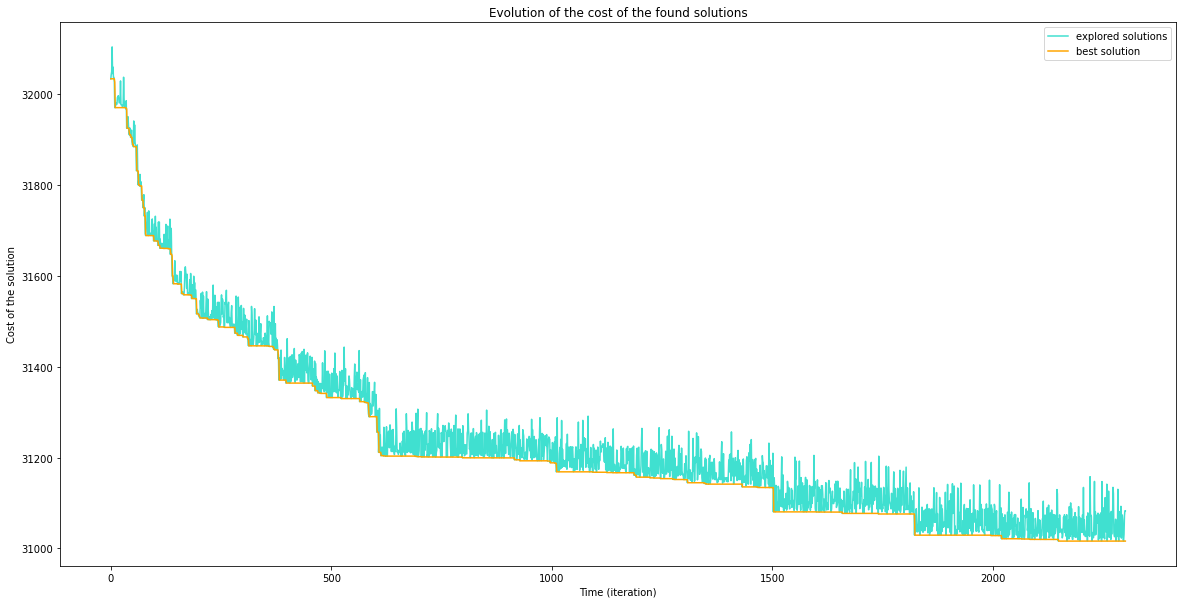

In [36]:
sa.plot_evolution_cost()

In [31]:
instance =GeneticAlgorithm(num_evolu_per_search=2,neighborhood_params=neighborhood_params)
instance.fit(vrptw)
instance.init()

In [32]:
# take almost 30s for 10 search with 10 evolution per search
for _ in range(1):
    instance.search()
instance.plot_evolution_cost()

KeyboardInterrupt: 

DATA GENERATOR

In [ ]:
import random
import numpy as np
import pandas as pd

In [ ]:
def generator_demand(low=8,high=42):
    tmp=int(np.random.normal(20,10))
    while(tmp<low or tmp>high):
        tmp=int(np.random.normal(20,10))
    return tmp

def generator_time_window(right=1300,avr_during=400,sigma_start=150,sigma_during=13):
    variance_start=sigma_start*sigma_start
    variance_during=sigma_during*sigma_during
    start=int(np.random.normal(450,variance_start))
    while(start>1050 or start<0):
        start=int(np.random.normal(450,variance_start))  
    
    during=int(np.random.normal(avr_during,variance_during))
    while(during<120):
        during=int(np.random.normal(avr_during,variance_during))  
    end=min(start+during,right)
    return start,end

def generator_datum():
    time_window = generator_time_window(1440, 650)
    start_time, end_time = time_window
    return random.randint(0, 100),random.randint(0, 100),generator_demand(),start_time,end_time,int(np.random.normal(80,3))

def generator_data(id_start,id_end):
    for i in range(id_start,id_end+1):
        print(f'{i},'+(str(generator_datum())).replace(' ','').replace('(','').replace(')','')+',')

In [ ]:
def generate_dataframe(n_customers=10):
    columns = ['CUSTNO', 'XCOORD', 'YCOORD', 'DEMAND', 'READYTIME', 'DUETIME', 'SERVICETIME']
    df = pd.DataFrame(data=([i]+list(generator_datum()) for i in range(1, n_customers+1)), columns=columns)
    df['CAPACITY'] = 200
    return df

def generate_csv(filename, n_customers):
    df = generate_dataframe(n_customers)
    df.to_csv(filename, index=False)    

In [ ]:
cd data_solomon

In [ ]:
generate_csv('A50.csv', 50)